In [2]:
cd ..

c:\EEG\ArmBand


In [ ]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline


In [4]:
from math import atan2, cos, sin, sqrt, pi

def drawAxis(img, p_, q_, color, scale):
    p = list(p_)
    q = list(q_)

    ## [visualization1]
    angle = atan2(p[1] - q[1], p[0] - q[0]) # angle in radians
    hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))

    # Here we lengthen the arrow by a factor of scale
    q[0] = p[0] - scale * hypotenuse * cos(angle)
    q[1] = p[1] - scale * hypotenuse * sin(angle)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), color, 3, cv2.LINE_AA)

    # create the arrow hooks
    p[0] = q[0] + 9 * cos(angle + pi / 4)
    p[1] = q[1] + 9 * sin(angle + pi / 4)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), color, 3, cv2.LINE_AA)

    p[0] = q[0] + 9 * cos(angle - pi / 4)
    p[1] = q[1] + 9 * sin(angle - pi / 4)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), color, 3, cv2.LINE_AA)
    ## [visualization1]
    

def getOrientation(pts, img):
      ## [pca]
  # Construct a buffer used by the pca analysis
  sz = len(pts)
  data_pts = np.empty((sz, 2), dtype=np.float64)
  for i in range(data_pts.shape[0]):
    data_pts[i,0] = pts[i,0,0]
    data_pts[i,1] = pts[i,0,1]
 
  # Perform PCA analysis
  mean = np.empty((0))
  mean, eigenvectors, eigenvalues = cv2.PCACompute2(data_pts, mean)
 
  # Store the center of the object
  cntr = (int(mean[0,0]), int(mean[0,1]))
  ## [pca]
 
  ## [visualization]
  # Draw the principal components
  cv2.circle(img, cntr, 3, (255, 0, 255), 2)
  p1 = (cntr[0] + 0.02 * eigenvectors[0,0] * eigenvalues[0,0], cntr[1] + 0.02 * eigenvectors[0,1] * eigenvalues[0,0])
  p2 = (cntr[0] - 0.02 * eigenvectors[1,0] * eigenvalues[1,0], cntr[1] - 0.02 * eigenvectors[1,1] * eigenvalues[1,0])
  drawAxis(img, cntr, p1, (255, 255, 0), 1)
  drawAxis(img, cntr, p2, (0, 0, 255), 5)
 
  angle = atan2(eigenvectors[0,1], eigenvectors[0,0]) # orientation in radians
  ## [visualization]
 
  # Label with the rotation angle
  label = "  Rotation Angle: " + str(-int(np.rad2deg(angle)) - 90) + " degrees"
  print(label)
  plt.figure(figsize=(10, 10))

  plt.imshow(img)
  plt.show()
  return angle

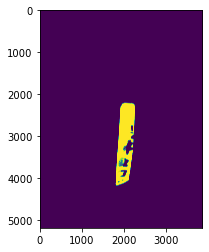

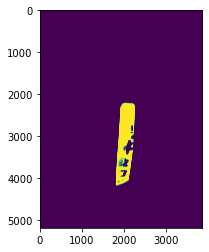

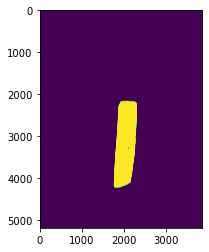

  Rotation Angle: -180 degrees


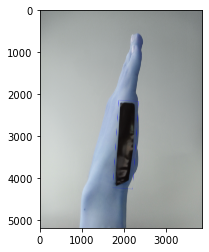

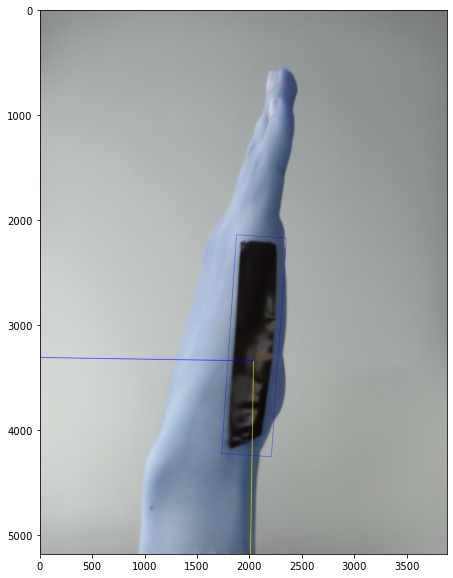

1.5865407264126121


In [5]:
image = cv2.imread('resources/IMG_20220715_164024.jpg')



gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
lower = np.uint8([0])
upper = np.uint8([50])
black_mask = cv2.inRange(gray, lower, upper)
plt.imshow(black_mask)
plt.show()


black_mask = cv2.GaussianBlur(black_mask, (5, 5), 0)    


plt.imshow(black_mask)
plt.show()





kernel = np.ones((20,20),np.uint8)
black_mask = cv2.dilate(black_mask,kernel, iterations = 5)

kernel = np.ones((5,5),np.uint8)
black_mask = cv2.morphologyEx(black_mask, cv2.MORPH_CLOSE, kernel)

plt.imshow(black_mask)
plt.show()
cnts, hierarchy =cv2.findContours(black_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


#cv2.drawContours(image, cnts, -1, (0, 255, 0), 4)
rect = cv2.minAreaRect(cnts[0])
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(image,[box],0,(0,0,255),2)

plt.imshow(image)
print(getOrientation(cnts[0], image))
# contours, hierarchy = cv2.findContours(black_mask, 
#     cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cv2.drawContours(np.zeros(image.shape), contours, -1, (0, 255, 0), 3)
# plt.imshow(black_mask)
# plt.show()